In [1]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from eda_helpers import plot_bargraph_with_groupings, plot_images

## Get classes from class definition

In [2]:
base_path = '../../data/food101'
classes = pd.read_csv(os.path.join(base_path, 'meta/meta/classes.txt'), header=None, index_col=0,)
labels = pd.read_csv(os.path.join(base_path, 'meta/meta/labels.txt'), header=None)
classes['map'] = labels[0].values
classes['class'] = labels.index
classes_to_labels_map = classes['map'].to_dict()
classes_to_class_map = classes['class'].to_dict()

# Create mapping function path_name => class and class label
def label_from_folder_map(class_to_label_map):
    return  lambda o: class_to_label_map[(o.split(os.path.sep))[-2]]

label_from_folder_food_func = label_from_folder_map(classes_to_labels_map)
class_from_folder_food_func = label_from_folder_map(classes_to_class_map)

## Extract train and test dataset

In [3]:
train_df = pd.read_csv(os.path.join(base_path, 'meta/meta/train.txt'), header=None).apply(lambda x : x + '.jpg')
test_df = pd.read_csv(os.path.join(base_path, 'meta/meta/test.txt'), header=None).apply(lambda x : x + '.jpg')
train_df = train_df.rename(columns={0: "image"})
test_df = test_df.rename(columns={0: "image"})

## Add class number and class label to dataframes

In [4]:
train_df['class'] = train_df['image'].apply(lambda x: class_from_folder_food_func(x))
train_df['label'] = train_df['image'].apply(lambda x: label_from_folder_food_func(x))

test_df['class'] = test_df['image'].apply(lambda x: class_from_folder_food_func(x))
test_df['label'] = test_df['image'].apply(lambda x: label_from_folder_food_func(x))


In [5]:
train_df.head(5)

,image,class,label
0,apple_pie/1005649.jpg,0,Apple pie
1,apple_pie/1014775.jpg,0,Apple pie
2,apple_pie/1026328.jpg,0,Apple pie
3,apple_pie/1028787.jpg,0,Apple pie
4,apple_pie/1043283.jpg,0,Apple pie


## Train Dataset Examples

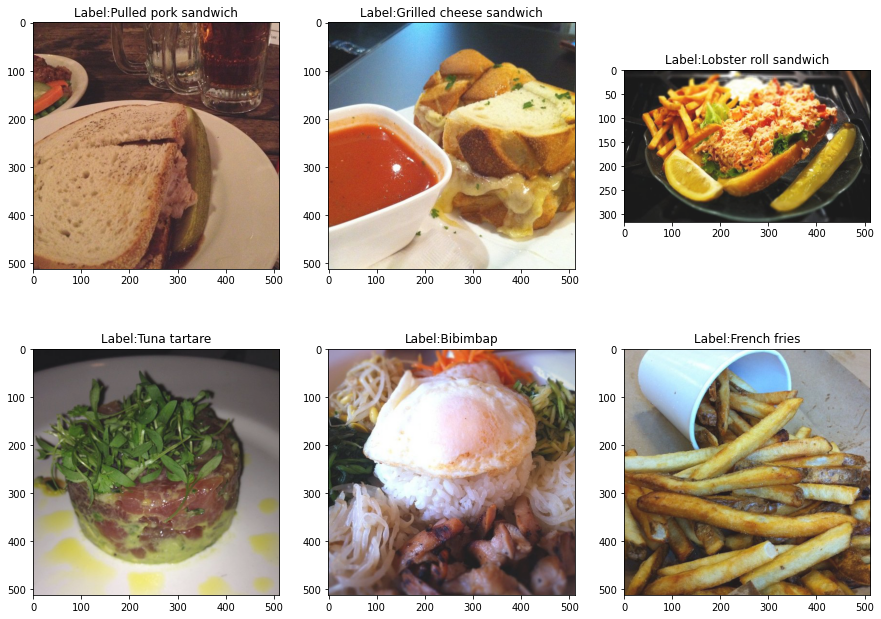

In [6]:
plot_images(train_df, os.path.join(base_path, 'images'))

## Train Data Distribution

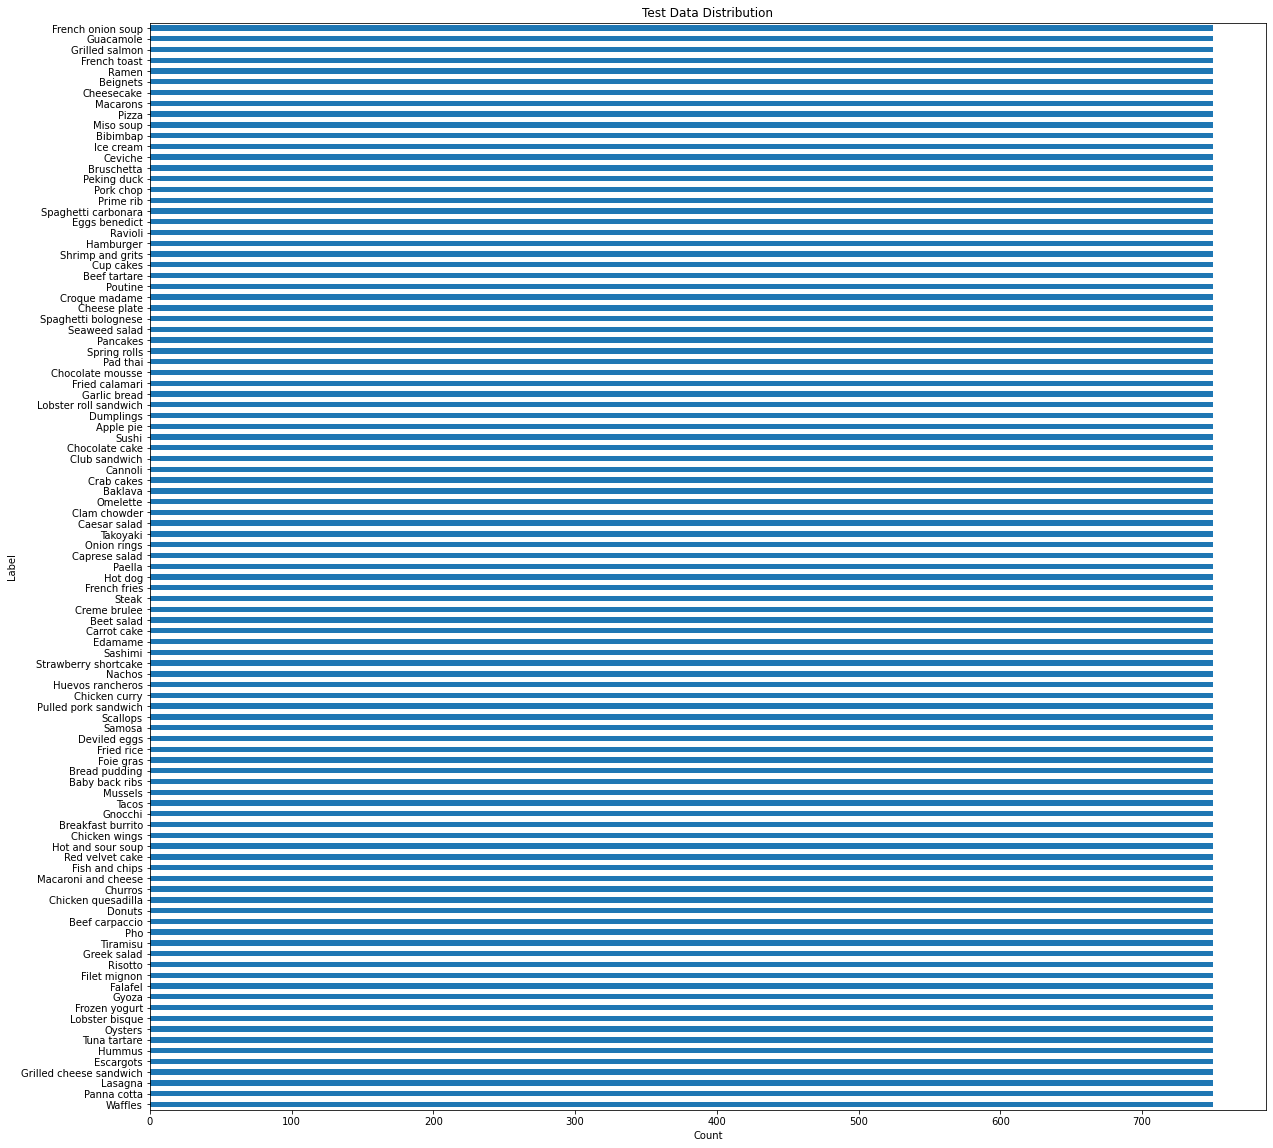

In [7]:
plot_bargraph_with_groupings(train_df, 'label', 'Test Data Distribution', 'Count', 'Label')

## Test Data Distribution

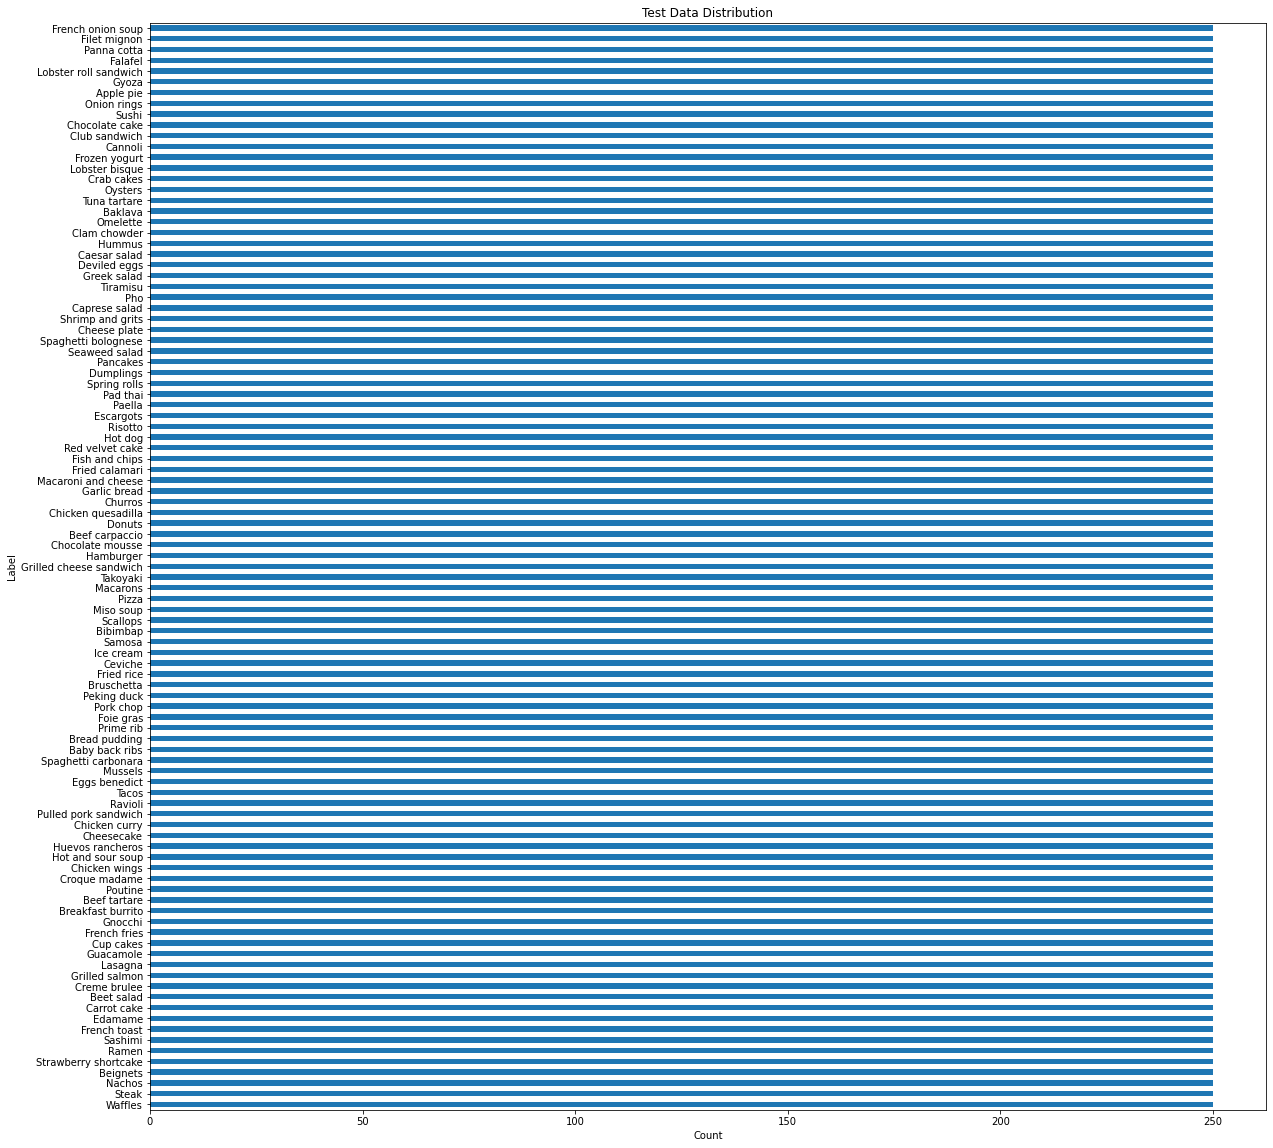

In [8]:
plot_bargraph_with_groupings(test_df, 'label', 'Test Data Distribution', 'Count', 'Label')